Simple Linear Regression


steps are:
1) load the dataset

2) preprocessing

3)split into training and test dataset

4)standardise the training data 

5)train the model

6)standardise the test data and predict

7)done



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
#the input feature must be in 2D array or df and not series
X = df[['Weight']]
y = df['Height']

In [6]:
X.shape,y.shape

((23, 1), (23,))

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)


In [8]:
##standardise the train dataset and test dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Y_train')

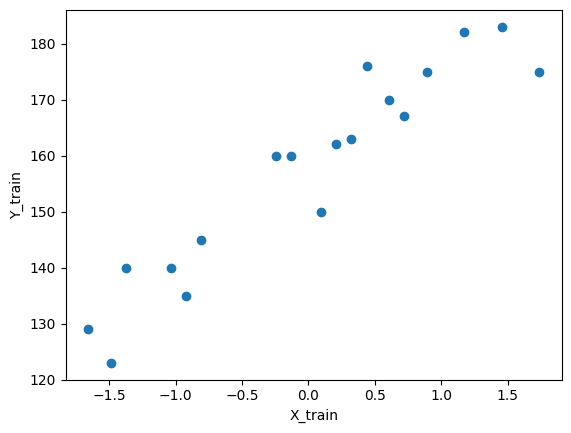

In [9]:
plt.scatter(X_train,y_train)
plt.xlabel("X_train")
plt.ylabel("Y_train")

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
regressor = LinearRegression()


In [12]:
regressor.fit(X_train,y_train)

LinearRegression()

In [13]:
print("SLope",regressor.coef_)
print("Intercept",regressor.intercept_)


SLope [17.03440872]
Intercept 157.5


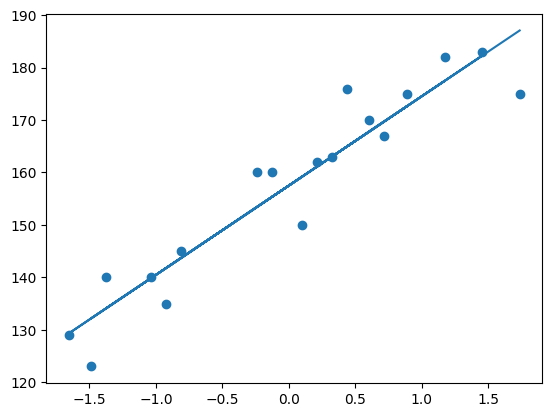

In [14]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

In [15]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [16]:
y_pred_test = regressor.predict(X_test)
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [17]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
print(score)


0.776986986042344


In [18]:
score = r2_score(y_train,regressor.predict(X_train))
print(score)


0.8930630841011482


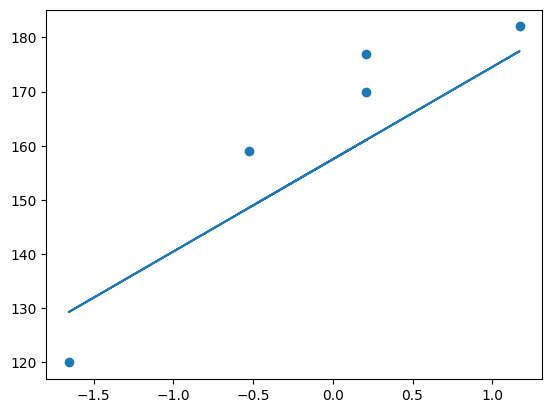

In [19]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test)

In [20]:
regressor.predict(scaler.transform([[65]]))

c:\Users\KIIT\ML-UDEMY\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([148.56507414])

In [21]:
import pickle


In [22]:
pickle.dump(regressor,open('linearmodel.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))